In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal, norm

# Activity - 1

In [2]:
N_values = [1, 2, 10]  # Number of variables to sum
num_samples = 10000  # Number of samples

#Dictionary 
results = {}

for N in N_values:
    rand_samples = np.random.uniform(0, 1, (num_samples, N))
    rand_samples_means = np.mean(rand_samples, axis=1)

    results[f'rand_samples_{N}'] = rand_samples
    results[f'rand_samples_means_{N}'] = rand_samples_means
    
#print(results['rand_samples_2'])
#print(results['rand_samples_means_2'])

#plt.hist(results['rand_samples_means_10'], bins = 20)

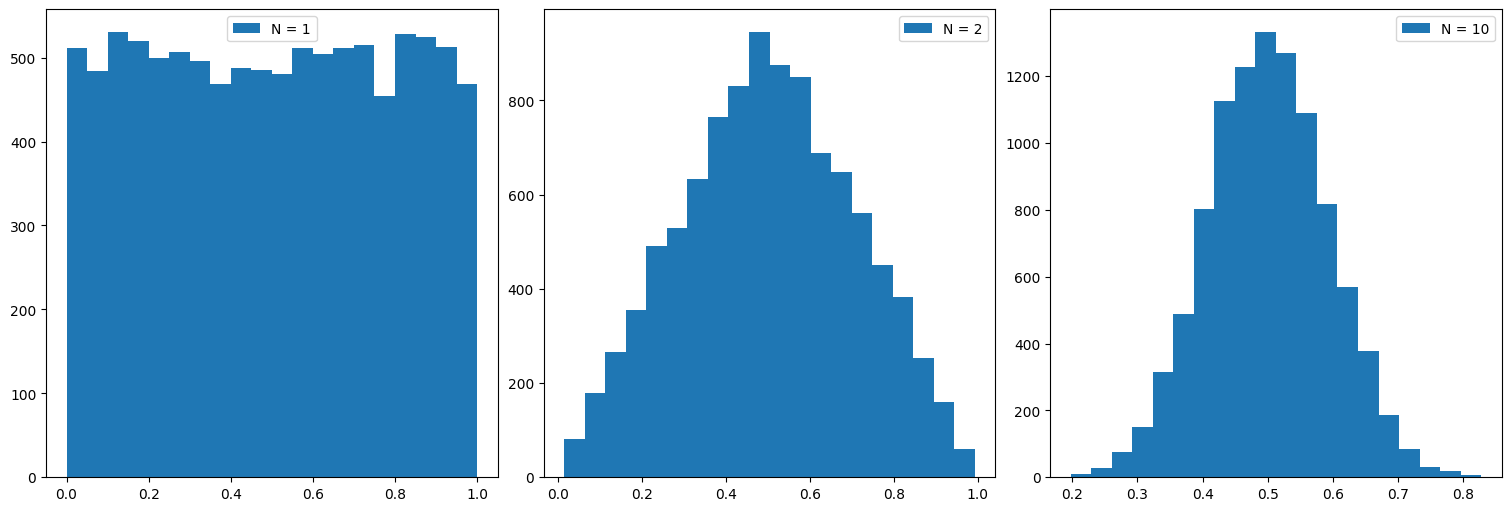

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

for i, num in enumerate(N_values):
    axes[i].hist(results[f'rand_samples_means_{num}'], bins = 20, label = f"N = {num}")
    axes[i].legend()

plt.show()

0.5003160068575255 0.09251310605498816


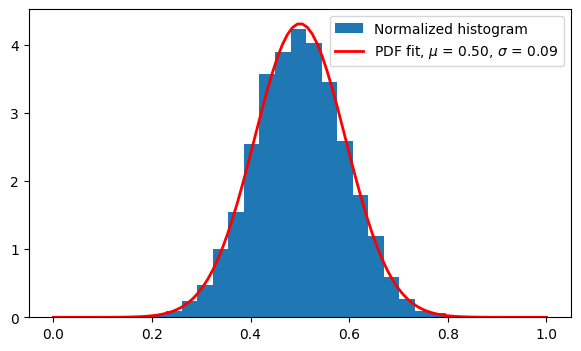

In [4]:
mu, std = norm.fit(results['rand_samples_means_10'])
print(mu, std)

x = np.linspace(0, 1, 100)
p = norm.pdf(x, mu, std)

#Plotting
plt.figure(figsize=(7, 4))
plt.hist(results['rand_samples_means_10'], bins = 20, density=1, label = 'Normalized histogram')
plt.plot(x, p, c='red', linewidth=2, label = f'PDF fit, $\\mu$ = {mu:.2f}, $\\sigma$ = {std:.2f}')
plt.legend()
plt.show()

# Activity - 2
## Analysis - 1

In [5]:
cov = np.array([[4, 2], [2, 16]])
mean = np.array([0, 0])

In [6]:
events = np.random.multivariate_normal(mean, cov, 1000)
x_coord, y_coord = events[:,0], events[:,1]

In [10]:
#print(x_coord, y_coord)

## Analysis - 2.

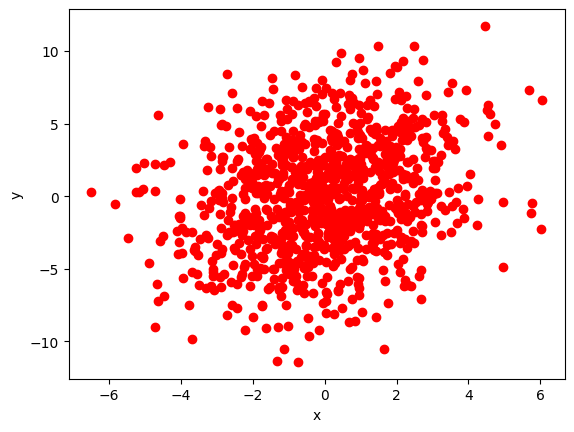

In [7]:
plt.scatter(x_coord, y_coord, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

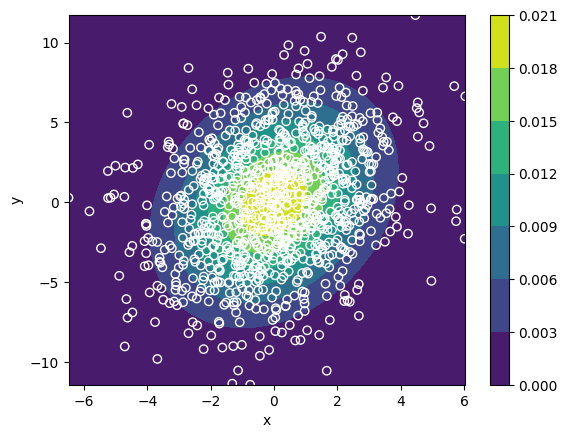

In [8]:
#generate a grid and define pdf for grid points
x = np.linspace(min(x_coord), max(x_coord), 500)
y = np.linspace(min(y_coord), max(y_coord), 500)
X, Y = np.meshgrid(x, y)
grid = np.dstack((X, Y))
Z = multivariate_normal(mean, cov).pdf(grid)
contour = plt.contourf(X, Y, Z) 
plt.colorbar(contour)
plt.scatter(x_coord, y_coord, facecolors='none', edgecolors='white', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Activity - 3

In [17]:
N = 100 # Number of variables to sum
num_samples = 1  # Number of samples

data = np.random.normal(loc=0, scale=1, size=N)
true_mu = 0
true_sigma = 1
#print(data)
data.shape

(100,)

In [18]:
mu_ML = np.sum(data)/N
Sigma_ML = np.sum(np.dot((data - mu_ML), (data - mu_ML).T))/N
E_mu_ML = 0
E_sigma_ML = (N - 1) * sigma / N

In [19]:
print(mu_ML, Sigma_ML)
print(E_mu_ML, E_sigma_ML)

-0.0897181033195574 0.9532915000494444
0 0.99


In [66]:
N = 1000 # Number of variables to sum
num_samples = 1  # Number of samples

data = np.random.normal(loc=0, scale=1, size=N)
alpha_mu = 0.01
alpha_var = 0.01

def Sequential_estimator(data):
    N = len(data)
    n = np.arange(1, N+1)
    mu_exp = np.array([])
    var_exp = np.array([])

    #initialize the parameters
    mu = -0.3
    var = 0.0

    for i, element in enumerate(data):
        if i != 0:
            mu_prev = mu
            mu = mu + (1/i) * (element - mu) 

            var = ((i-1)*var + (element - mu)*(element - mu_prev))/i

            mu_exp = np.append(mu_exp, mu)
            var_exp = np.append(var_exp, var)

    return mu_exp, var_exp

mu_ML, var_ML = Sequential_estimator(data)
sigma_ML = np.sqrt(var_ML)


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_974/725106343.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(range(2, N + 1), mu_ML, label="Sequential $\mu$", color="blue")
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_974/725106343.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.axhline(true_mu, color="red", linestyle="--", label="True $\mu$")


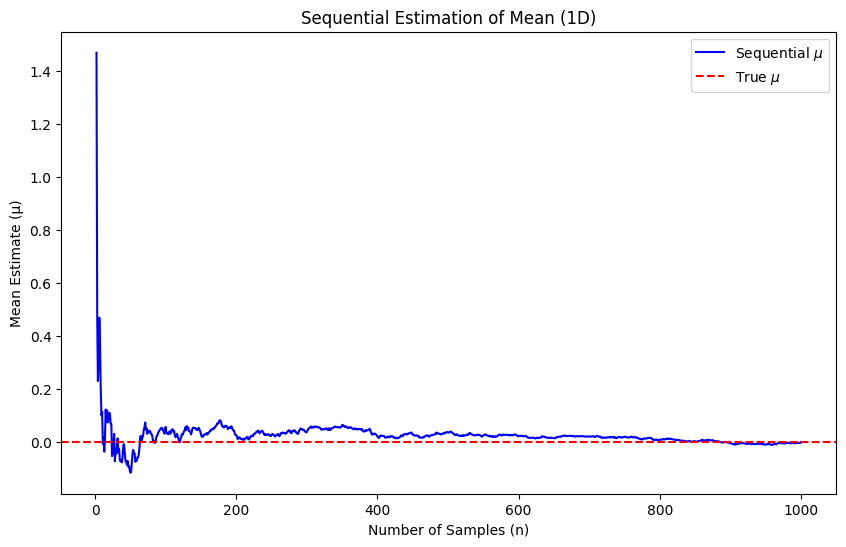

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, N + 1), mu_ML, label="Sequential $\mu$", color="blue")
plt.axhline(true_mu, color="red", linestyle="--", label="True $\mu$")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Mean Estimate (μ)")
plt.title("Sequential Estimation of Mean (1D)")
plt.legend()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_974/955934484.py:2: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(range(2, N+1), sigma_ML, label="Sequential $\sigma$", color="blue")
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_974/955934484.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.axhline(true_sigma, color="red", linestyle="--", label="True $\sigma$")


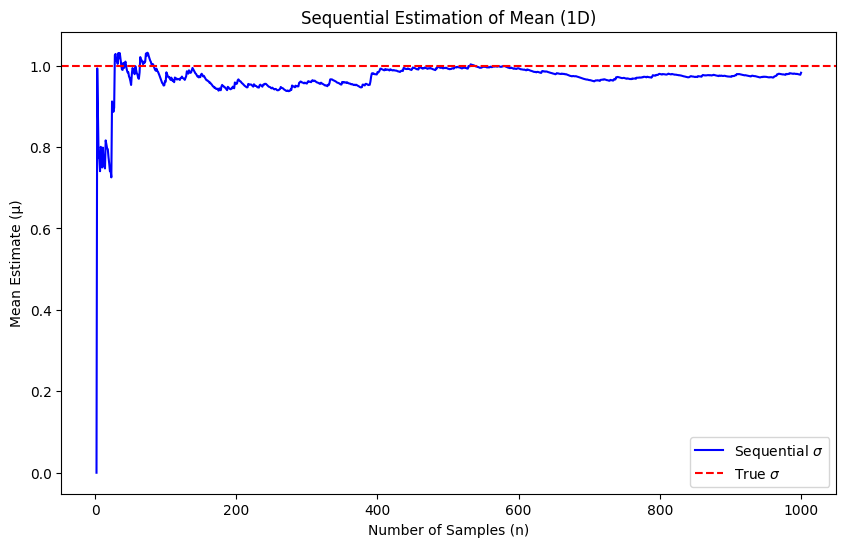

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, N+1), sigma_ML, label="Sequential $\sigma$", color="blue")
plt.axhline(true_sigma, color="red", linestyle="--", label="True $\sigma$")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Mean Estimate (μ)")
plt.title("Sequential Estimation of Mean (1D)")
plt.legend()
plt.show()